In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['SPY', 'SQQQ', 'DIA', 'SDOW']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [3]:
company_list = [SPY, SQQQ, DIA, SDOW]
company_name = ['SPY', 'SQQQ', 'DIA', 'SDOW']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-11-24,28.400000,27.850000,28.379999,27.879999,4935000.0,27.879999,SDOW
2021-11-26,30.379999,29.420000,29.680000,29.990000,6969700.0,29.990000,SDOW
2021-11-29,30.020000,29.030001,29.090000,29.430000,5619800.0,29.430000,SDOW
2021-11-30,31.139999,29.730000,30.049999,31.030001,10276500.0,31.030001,SDOW
2021-12-01,32.230000,29.520000,30.160000,32.200001,10939100.0,32.200001,SDOW
2021-12-02,32.009998,30.090000,31.820000,30.360001,16284500.0,30.360001,SDOW
2021-12-03,31.389999,29.959999,30.110001,30.540001,15124800.0,30.540001,SDOW
2021-12-06,29.870001,28.490000,29.760000,28.799999,11216900.0,28.799999,SDOW
2021-12-07,28.080000,27.379999,28.040001,27.610001,6681400.0,27.610001,SDOW


In [7]:
#Summary
SPY.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,421.594901,417.559091,419.672728,419.788814,7.270023e+07,417.722167
std,29.504690,29.824509,29.673589,29.669466,2.826551e+07,31.000548
min,366.739990,362.029999,364.899994,364.660004,2.645790e+07,359.594543
25%,392.750000,389.329987,391.000000,391.480011,5.150850e+07,387.687592
50%,423.019989,419.920013,422.570007,422.119995,6.465360e+07,419.469452
75%,444.630005,441.309998,442.809998,443.179993,8.552700e+07,442.500000
max,473.540009,468.500000,470.890015,469.730011,1.834330e+08,469.730011


In [5]:
# General info
SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-12-01 to 2021-12-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          253 non-null    float64
 1   Low           253 non-null    float64
 2   Open          253 non-null    float64
 3   Close         253 non-null    float64
 4   Volume        253 non-null    float64
 5   Adj Close     253 non-null    float64
 6   company_name  253 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


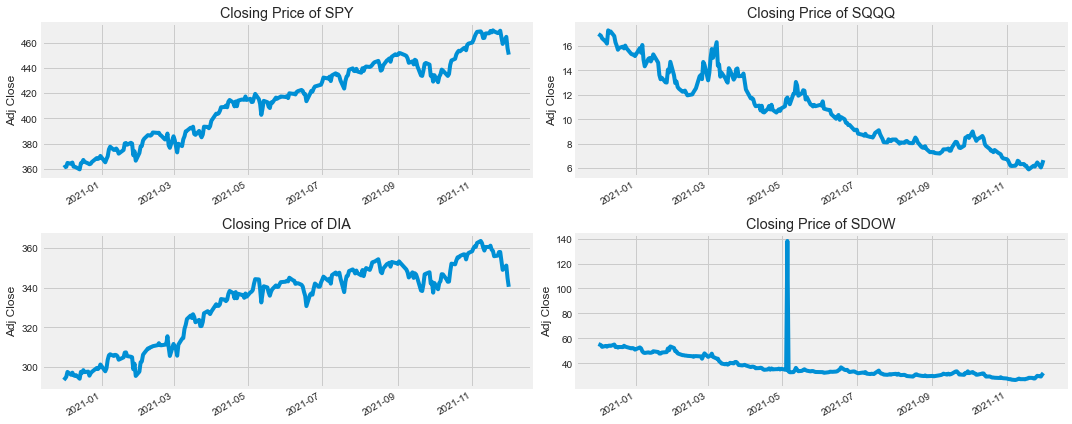

In [6]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

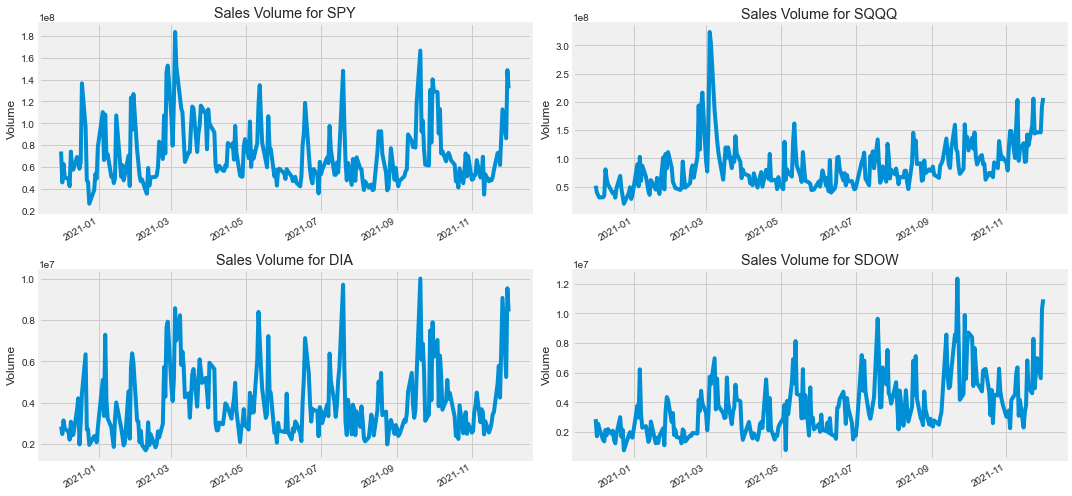

In [7]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [9]:
# df.groupby("company_name").hist(figsize=(12, 12));

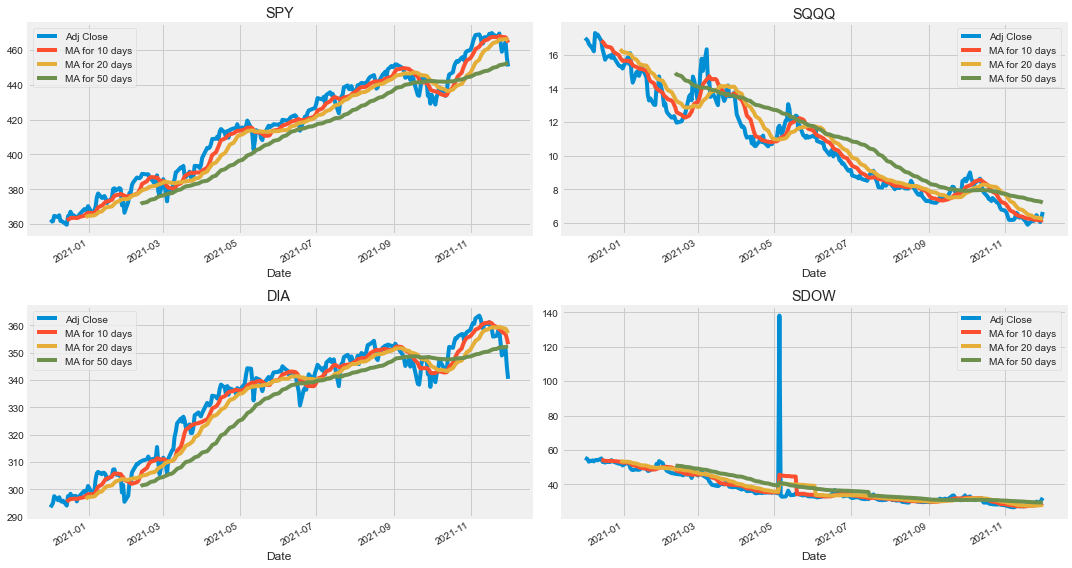

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

SPY[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('SPY')

SQQQ[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('SQQQ')

DIA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('DIA')

SDOW[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('SDOW')

fig.tight_layout()

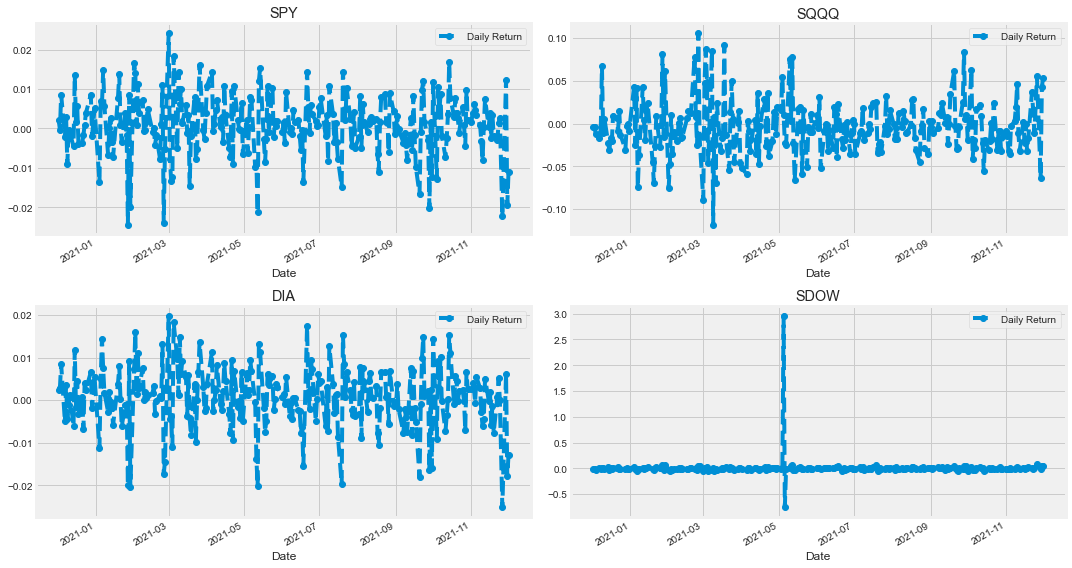

In [11]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

SPY['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('SPY')

SQQQ['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('SQQQ')

DIA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('DIA')

SDOW['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('SDOW')

fig.tight_layout()

/Users/bryanlarson/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bryanlarson/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bryanlarson/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

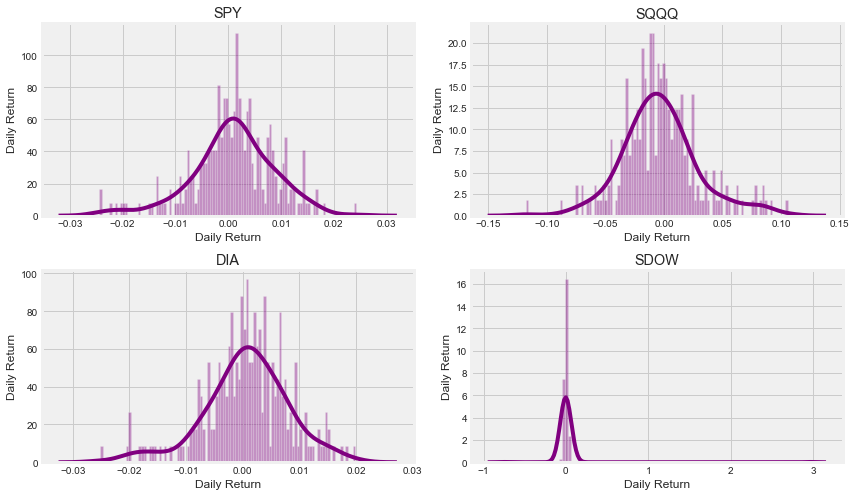

In [12]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

In [13]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head()

Symbols,SPY,SQQQ,DIA,SDOW
Date,,,,
2020-12-01,360.935638,16.990000,293.441742,55.480000
2020-12-02,361.694946,16.920000,294.169342,55.080002
2020-12-03,361.596375,16.850000,295.034607,54.639999
2020-12-04,364.712433,16.639999,297.522247,53.200001
2020-12-07,363.962982,16.360001,296.057159,53.959999


In [14]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,SPY,SQQQ,DIA,SDOW
Date,,,,
2020-12-01,NaN,NaN,NaN,NaN
2020-12-02,0.002104,-0.004120,0.002480,-0.007210
2020-12-03,-0.000273,-0.004137,0.002941,-0.007988
2020-12-04,0.008618,-0.012463,0.008432,-0.026354
2020-12-07,-0.002055,-0.016827,-0.004924,0.014286


/Users/bryanlarson/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


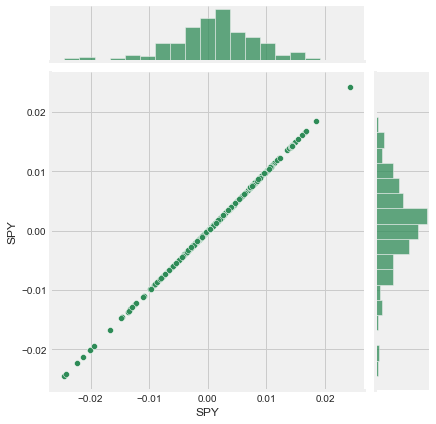

In [15]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('SPY', 'SPY', tech_rets, kind='scatter', color='seagreen')

/Users/bryanlarson/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


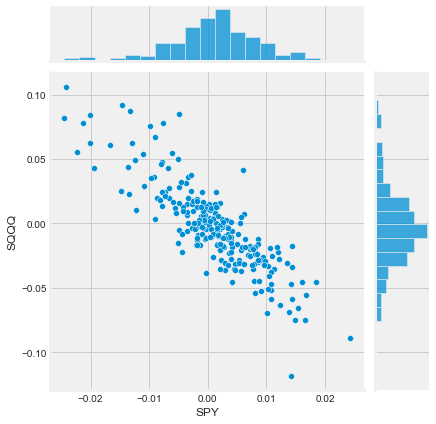

In [16]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('SPY', 'SQQQ', tech_rets, kind='scatter')

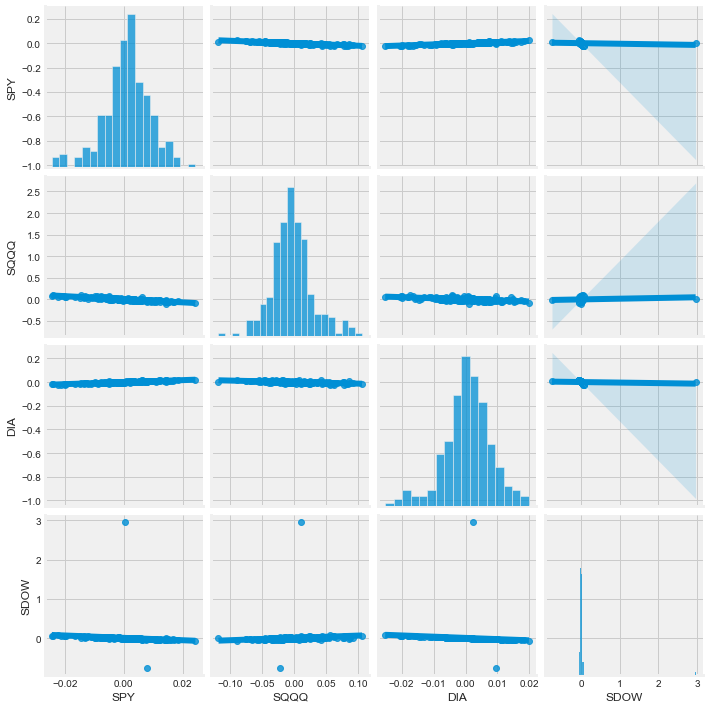

In [17]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

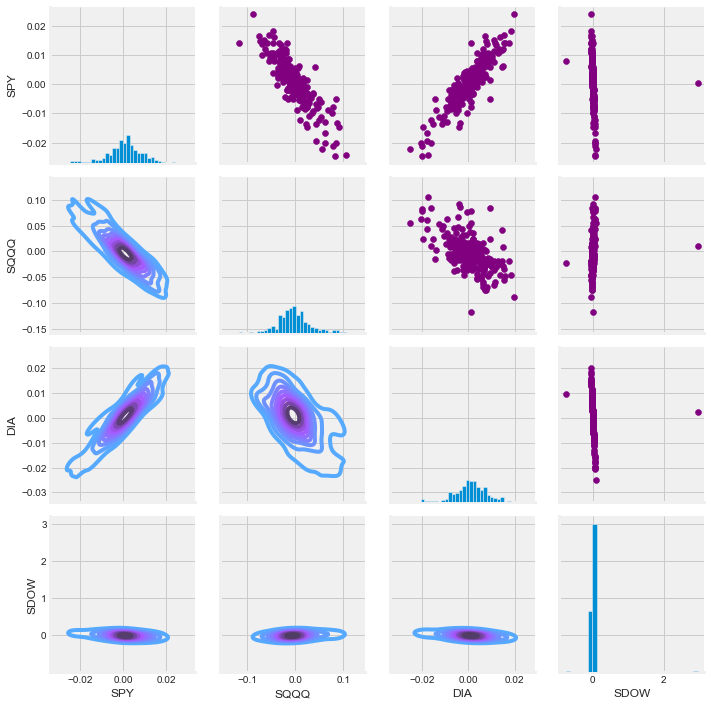

In [18]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

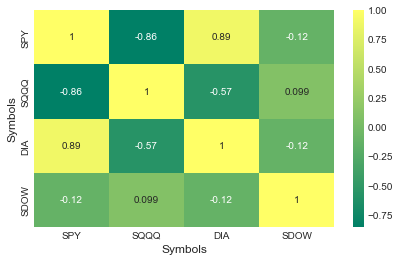

In [19]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

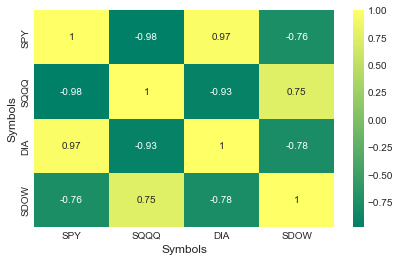

In [20]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

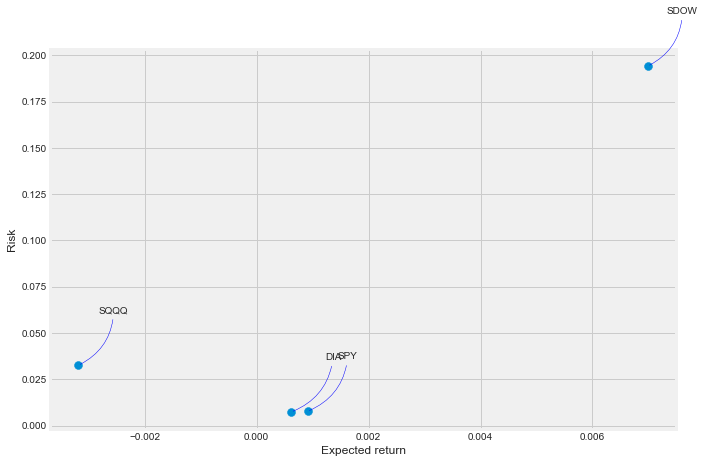

In [21]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [22]:
# Get the stock quote
df = DataReader('SPY', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,128.380005,127.430000,127.760002,127.500000,193697900.0,105.646721
2012-01-04,127.809998,126.709999,127.199997,127.699997,127186500.0,105.812424
2012-01-05,128.229996,126.430000,127.010002,128.039993,173895000.0,106.094162
2012-01-06,128.220001,127.290001,128.199997,127.709999,148050000.0,105.820740
2012-01-09,128.179993,127.410004,128.000000,128.020004,99530200.0,106.077614
...,...,...,...,...,...,...
2021-11-24,469.570007,465.190002,466.059998,469.440002,61858800.0,469.440002
2021-11-26,463.899994,457.769989,462.339996,458.970001,112669600.0,458.970001
2021-11-29,466.559998,461.730011,464.070007,464.600006,86268800.0,464.600006


In [23]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2372

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00000000e+00],
       [5.84393367e-04],
       [1.57786655e-03],
       ...,
       [9.85010067e-01],
       [9.58595059e-01],
       [9.43809688e-01]])

In [25]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.        , 0.00058439, 0.00157787, 0.00061362, 0.00151946,
       0.00476289, 0.00496741, 0.00587323, 0.00391548, 0.00537649,
       0.00955499, 0.01157118, 0.01300294, 0.01200947, 0.01157118,
       0.01478537, 0.01279842, 0.01262311, 0.01130817, 0.01116211,
       0.0145224 , 0.015136  , 0.02057094, 0.02030797, 0.02130144,
       0.02247027, 0.02296701, 0.020045  , 0.02296701, 0.02247027,
       0.02062939, 0.02498321, 0.02603513, 0.02621045, 0.02492475,
       0.02667798, 0.02755455, 0.02822664, 0.02939543, 0.02781756,
       0.02989216, 0.02866492, 0.02702861, 0.02118458, 0.02393128,
       0.02787597, 0.02942468, 0.02945388, 0.03670046, 0.03626217,
       0.03862899, 0.03740176, 0.03900887, 0.03781083, 0.03713878,
       0.03418752, 0.03550242, 0.04122958, 0.03994389, 0.03789849])]
[0.037197192878702934]

[array([0.        , 0.00058439, 0.00157787, 0.00061362, 0.00151946,
       0.00476289, 0.00496741, 0.00587323, 0.00391548, 0.00537649,
       0.00955499, 0.01157118, 0.0

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

ModuleNotFoundError: No module named 'tensorflow'